In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
path = "e://python3/cv/"
file1="2.jpg"#"2.jpg"#"chang.png""checker128-var20.png"
file2="checker196-var20.png"#"checker196-var20.png"
img1h=1440
img1w=1080
img2h=256
img2w=256
L=256
bins_num=256
img1 = Image.open(path+str(file1)) 
imageMatrix1 = np.matrix(img1.getdata())
img2=Image.open(path+str(file2))
imageMatrix2=np.matrix(img2.getdata())


In [3]:
def grey_kernel(matrix,L):
    d=[0]*L
    grey=0
    for i in range(matrix.shape[0]):
        grey=np.uint8(round(0.299*matrix[i,0]+0.587*matrix[i,1]+0.114*matrix[i,2]))#matrix[i,0]#
        d[grey]+=1       
    return d

In [4]:
def ptbar(p,name,L=256,bins=1):  #show pdf/cdf of image and return cdf function
    for i in range(0,L,bins):
        for j in range(bins):
            if i+j<L:
                p[i]+=p[i+j]
    accp=[0]*L
    for i in range(L):
        if i==0:
            accp[i]=p[i]
        else:
            accp[i]=accp[i-1]+p[i]
    p=np.array(p)/accp[L-1]
    accp=np.array(accp)/accp[L-1]
    fig=plt.figure(figsize=(15,5))
    fig.add_subplot(121)
    plt.title(str(name)+"-pdf")
    plt.xlabel('intensity')
    plt.ylabel('freq')
    plt.grid(False)
    plt.bar(np.array(range(L))+0.5*bins,p,width=bins,color='b')
    fig.add_subplot(122)
    plt.title(str(name)+"-cdf")
    plt.xlabel('intensity')
    plt.ylabel('accfreq')
    plt.grid(False)
    plt.bar(np.array(range(L))+0.5*bins,accp,width=bins,color='b')
    plt.show()
    return accp

In [5]:
def eql(imageMatrix,accp,L=256):  #calculate equalition of image and return transferred image
    Trans={}
    for i in range(L):
        Trans[i]=int((L-1)*accp[i])                                   #transfer funciton      
    res=np.zeros(imageMatrix.shape,dtype=np.uint8)    
    if(res.shape[1]==4):
        res[:,3]=L-1                                                 #set forth element as 255
    for i in range(imageMatrix.shape[0]):                        #doing transformation for the first three elements.
        for j in range(imageMatrix.shape[1]-(res.shape[1]==4)):
            res[i,j]=Trans[imageMatrix[i,j]]
    return res,Trans

In [6]:
def showpic(raw,target):       #show picture and save picture                                       
    fig=plt.figure(figsize=(15,5))
    fig.add_subplot(121)
    plt.imshow(raw)
    fig.add_subplot(122)
    plt.imshow(target,cmap=plt.cm.gray)    

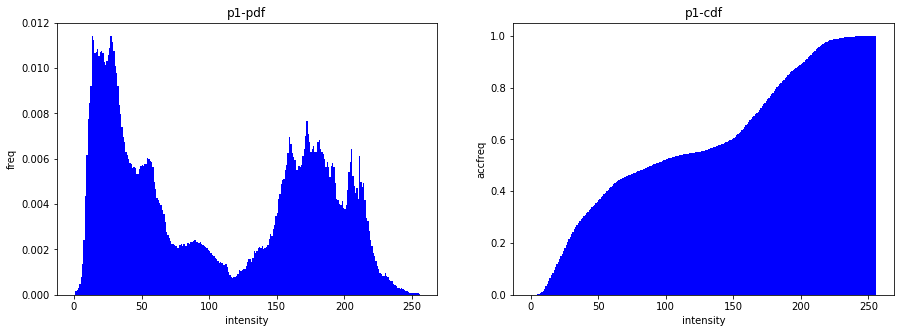

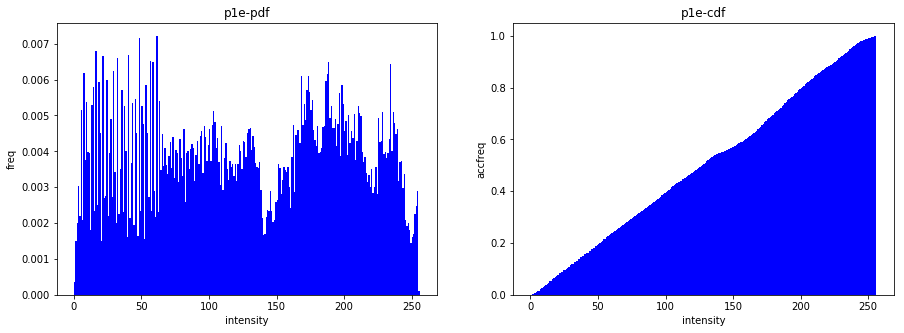

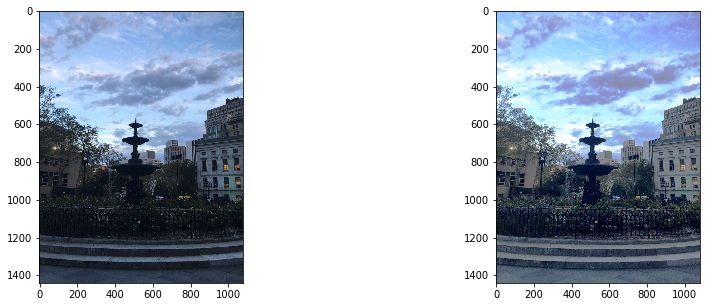

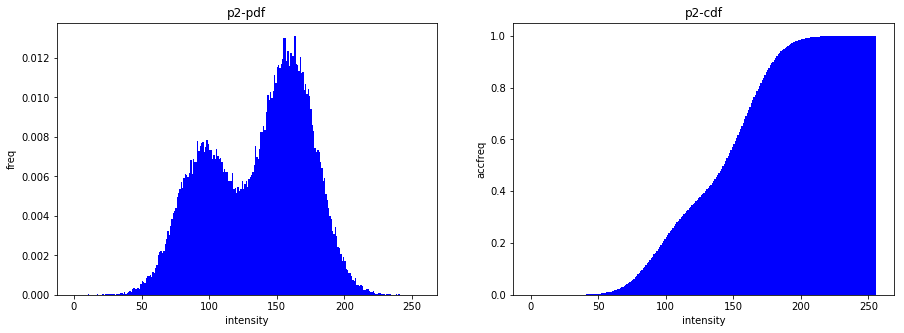

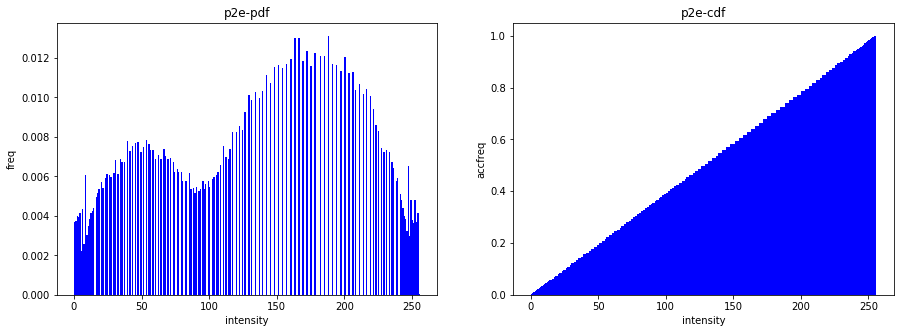

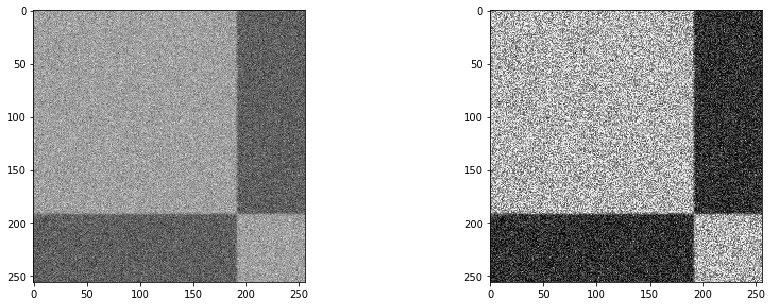

In [15]:

##-----------------------
p1=grey_kernel(imageMatrix1,L)
accp1=ptbar(p1,"p1",L,bins=int(L/bins_num))     #receive image ,draw pdf/cdf and produce cdf
equalization1,Trans1=eql(imageMatrix1,accp1)   #receive histograme cdf and transfer image to equalization image matrix
p1e=grey_kernel(equalization1,L)  #receive equalization image pdf and produce cdf
accp1e=ptbar(p1e,"p1e",L,bins=int(L/bins_num))  #receive image of equalization ,draw pdf/cdf and produce cdf

equalization1 = equalization1.reshape(img1h,img1w,imageMatrix1.shape[1])#for printing the image
                                           #int(np.sqrt(imageMatrix1.shape[0])),int(np.sqrt(imageMatrix1.shape[0]))
plt.imsave('tree_1.png', equalization1)  #for save image.
showpic(img1,equalization1)       #for plot the image.

##-----------------------        
p2=grey_kernel(imageMatrix2,L)
accp2=ptbar(p2,"p2",L,bins=int(L/bins_num))
equalization2,Trans2=eql(imageMatrix2,accp2)
p2e=grey_kernel(equalization2,L)
accp2e=ptbar(p2e,"p2e",L,bins=int(L/bins_num))


equalization2 = equalization2.reshape(img2h,img2w,imageMatrix2.shape[1])
                                    #int(np.sqrt(imageMatrix2.shape[0])),int(np.sqrt(imageMatrix2.shape[0]))
plt.imsave('tree_2.png', equalization2)
showpic(img2,equalization2)



In [152]:
def hist_match(imageMatrix,Trans1,Trans2):
    resfnl=np.zeros(imageMatrix.shape,dtype=np.uint8)    #python zhijie fuzhi biaoshi yinyong~!
    if (imageMatrix.shape[1]==4):
        resfnl[:,3]=L-1                                                 #set forth element as 255
    Trans2_rvs={}
    Trans2_rvs={v:k for k,v in Trans2.items()}
    for i in range(imageMatrix.shape[0]):                        #doing transformation for the first three elements.
        for j in range(imageMatrix.shape[1]-(res.shape[1]==4)):
            resfnl[i,j]=Trans1[imageMatrix[i,j]]
            if(not (resfnl[i,j] in Trans2_rvs)):
                key_list=np.array(list(Trans2_rvs.keys()))
                key_dist=np.abs(key_list-resfnl[i,j])
                resfnl[i,j]=key_list[np.argmin(key_dist)]
            resfnl[i,j]=Trans2_rvs[resfnl[i,j]]
    return resfnl



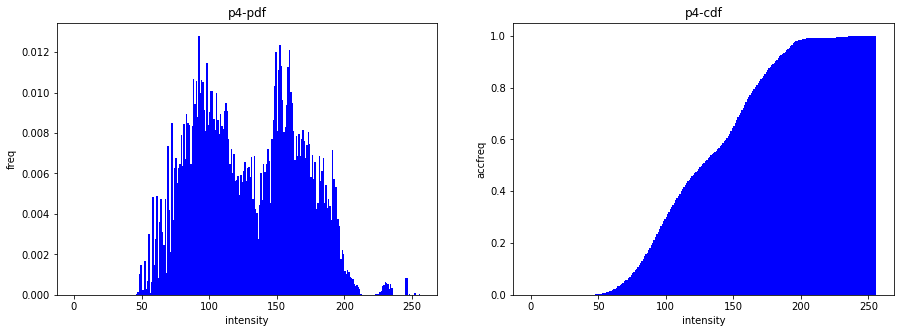

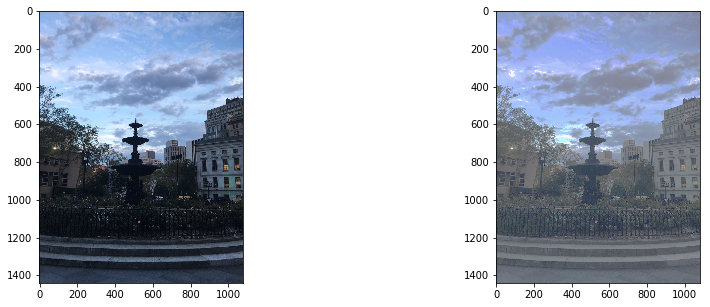

In [153]:
res=hist_match(imageMatrix1,Trans1,Trans2)
p4=grey_kernel(res,L)
ptbar(p4,"p4",L,bins=int(L/bins_num))     #receive image ,draw pdf/cdf and produce cdf

res = res.reshape(img1h,img1w,res.shape[1])#for printing the image
                    #int(np.sqrt(res.shape[0])),int(np.sqrt(res.shape[0]))
plt.imsave('match.png', res)  #for save image.
showpic(img1,res)       #for plot the image.
        
